# 중고등학생을 위한 머신러닝

## Chapter 8 : Linear Regression

## 머신러닝은 우리에게 주어진 X(벡터)들의 집합(행렬)을 통하여 y(실제값)을 예측하기 위한 방법이에요.
머신러닝에서 주목적은 회귀문제와 분류문제로 나누어 진다고 했죠? 그중에서 먼저 회귀문제를 간단하게 알아보고 갈게요.

회귀분석이란 주어진 데이터에서 직선이나 초평면을 만들어 데이터를 설명하고자 하는 것이에요.
여기서 초평면은 정확히 이해하지 않아도 괜찮아요. 주어진 데이터에서 차원에 맞게 패턴(규칙)을 찾고자 하는 거에요.

![linear](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)

![hyperplane](https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson02/image_01.gif)

![linear](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png)

위 그림을 보면 2차원 데이터가(x,y) 주어졌고, 우리는 빨간색 선이 없어도 데이터가 올라가는 경향이 있다는 것을 한 눈에 알아볼 수 있어요.
우리가 그림을 보면서 "아 이 데이터는 올라가는 패턴이 있구나"아는 것처럼 기계에게도 이렇게 "올라가구나, 내려가는구나, 얼마나 올라가지?, 얼마나 내려가지?"하는 등의 관계를 찾고자 하는 것이죠

$$y= f(x) + e$$

즉, 우리는 어떠한 함수를 찾아내어(2차원이라면 직선 혹은 이차곡선 등) 패턴을 찾아내고, 설명하지 못 하는 부분은 오차로 본다는 거죠.

그럼 과연 이러한 관계를 어떻게 찾아내는 걸까요? 그런데 컴퓨터가 이러한 관계를 바로바로 찾아낼 수 있는 것이 아니에요.
결국 사람이 이러한 관계를 가질 것이다 가정을 하고 컴퓨터에게 학습을 시켜야 하는거죠.

$$f(x)=a+bx$$

위의 함수는 가장 간단한 형태로 단순회귀분석이라고 불려요. 가장 간단하고도 이 데이터가 증가하고 있구나 감소하고 있구나 등의 관계를 가르쳐 줄 수 있는거죠. 그리고 이러한 a와 b의 값을 조정해가면서 데이터가 잘 맞는 지 안 맞는 지 확인해보는 거죠.

데이터가 잘 맞는 지 안 맞는 지 확인해보는 지표가 필요하게 되는데, 여기서 등장하는 것이 Cost Function이에요. 손실함수라기도 하고, 비용함수라고 불리기도 하죠. 가장 많이 쓰는 Cost Function은 error의 제곱합이에요. 간단하게 C(a,b)라고 할게요.

$$C(a,b)=\sum[(y-(a+bx)^2]=\sum(e^2)$$

여기서 C(a,b)라고 한 이유는 데이터가 잘 맞는 지 안 맞는 지 a와 b를 조정해나가면서 확인해보는건데 결국 a와 b에 따른 함수이기 때문이에요.
결국 이 Cost function은 에러의 제곱합을 나타내는거죠.

### Q1 : 위의 식 C(a,b)은 값이 올라가는 것이 좋을까요? 적은 것이 좋을까요?(정답은 읽다보면 있어요 ㅎㅎ)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

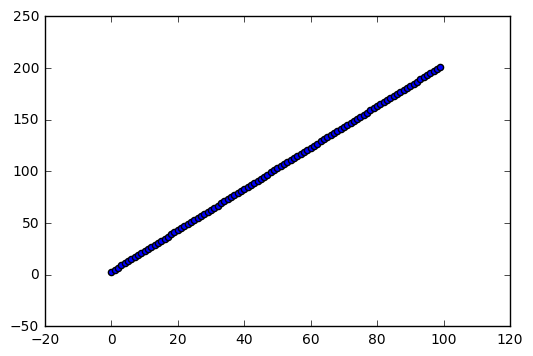

In [2]:
x=[]
y=[]
for i in range(100):
    x.append(i)
    y.append(2*i+3)
plt.scatter(x,y)

위 코드들은 $$y=2x+3$$를 만들어내기위한 코드에요.

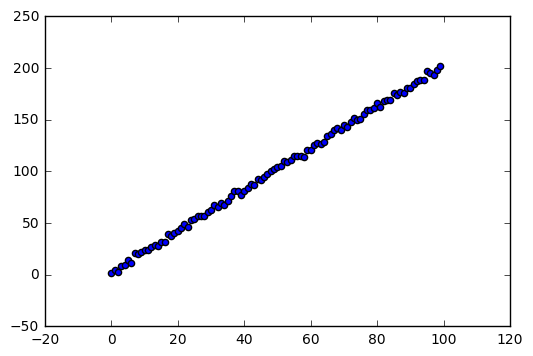

In [3]:
x=[]
y=[]
for i in range(100):
    error=np.random.normal(0,2)
    x.append(i)
    y.append(2*i+3+error)
plt.scatter(x,y)

위 코드들은 $$y=2x+3+e$$를 만들어내기위한 코드에요. e는 정규분포라는 함수에서 불러왔어요.

첫 번째 코드와 두 번째 코드의 차이를 알 수 있나요? 물론 두 번째 코드로 생성된 데이터들도 2x+3의 관계를 갖고 있지만 에러가 있다는 것을 볼 수 있죠.

### Q2: $y=3x+5+e$를 생성하기 위한 코드를 작성해보세요.

$$C(a,b)=\sum[(y-(a+bx)^2]$$

만약 우리가 a=3,b=2라고 생각한 후 Cost function을 구해본다면 다음과 같음을 알 수 있어요. pow(x,2)는 $x^2$이고 pow(y,2)는 $y^2$에요!~

In [4]:
error=[]
for i in range(len(y)):
    error.append(pow(y[i]-(3+2*x[i]),2))
sum(error)

387.79761455424034

만약 우리가 a=100,b=100라고 생각한 후 Cost function을 구해본다면 어떻게 될까요?

In [5]:
error=[]
for i in range(len(y)):
    error.append(pow(y[i]-(100+100*x[i]),2))
sum(error)

3248525848.9484286

$C(a,b)$는 분명 작아져야 할거에요. 왜냐하면 오차들은 작을 수록 좋은데, C(a,b)는 오차들의 제곱합이기 때문이에요.
제곱은 0보다 작을 수 없으니 0이거나 양수일텐데 오차가 커지면 커질 수록 C(a,b)는 값이 커질 수밖에 없는거죠.
a=100, b=100는 주어진 데이터에 대해 잘 설명을 못 하고 있다는 것을 알 수 있는거죠.

## Chapter 9 : Making Function

그럼 우리는 C(a,b)에 대해서 값을 일일이 다 넣어보면서 비교할 수밖에 없을까요? 1,2,3,4 ... 모두 일일이 넣으려면 너무도 수고로울거에요.
대신 우리가 컴퓨터에게 range를 이용해서 그 중 최소를 찾으라고 주문한다면 그 값을 쉽게 찾을 수도 있을거에요!
그러기 위해 필요한 것이 자신만의 함수를 만들어서 주문하는거에요!

In [6]:
def C(a,b):
    error=[]
    for i in range(len(y)):
        error.append(pow(y[i]-(a+b*x[i]),2))
    return sum(error)

def는 definition의 준말로 ~를 정의한다는거에요. C(a,b)는 위의 함수에서 말한 것처럼 a,b의 함수이기 때문에 a와 b를 넣는거죠.
(사실 x,y도 지정해야 하는데 일부로 생략했어요^^ 뒤에 더 자세히 설명할게요.) 그 밑에 코드들은 동일하죠?
return은 반환하다라는 뜻을 같고 있는데, 컴퓨터에게 sum(error)의 값을 반환하라고 말해주는거에요.

In [7]:
print C(3,2)
print C(100,100)

387.797614554
3248525848.95


아까 위에서 구한 값과 동일하게 나타나는 것을 알 수 있죠?

그럼 우리는 range를 이용해서 각 a와 b를 모두 집어넣어 보고 그 값중에서 가장 작은 것을 찾아보면 될거에요!

In [8]:
Clist=[]
for a in range(-10,10):
    for b in range(-10,10):
        Clist.append(C(a,b))
print min(Clist)

387.797614554


그런데 우리가 관심있는 것은 a와 b를 찾는거기 때문에 a,b를 저장하고, C(a,b)가 가장 작은 값들을 불러오도록 해야겠죠?

In [9]:
Cmin=10000
for a in range(-10,10):
    for b in range(-10,10):
        if C(a,b)<Cmin:
            Cmin=C(a,b)
            print [a,b,Cmin]

[-6, 2, 8327.460261177079]
[-5, 2, 6645.275522663431]
[-4, 2, 5163.09078414978]
[-3, 2, 3880.906045636134]
[-2, 2, 2798.721307122485]
[-1, 2, 1916.5365686088362]
[0, 2, 1234.3518300951869]
[1, 2, 752.1670915815375]
[2, 2, 469.9823530678891]
[3, 2, 387.79761455424034]


컴퓨터가 a,b를 조정해나가면서 Cmin을 비교해나가고, 각 단계마다 값을 출력하고 있는 것을 알 수 있죠?

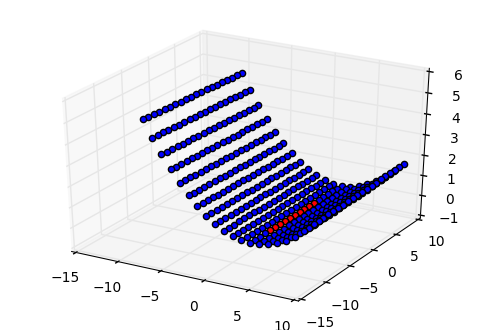

In [10]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for a in range(-10,10):
    for b in range(-10,10):
        ax.scatter(b,a,C(a,b))
Cmin=10000
for a in range(-10,10):
    for b in range(-10,10):
        if C(a,b)<Cmin:
            Cmin=C(a,b)
            ax.scatter(b,a,C(a,b),c='red')

a를 x축, b를 y축, C(a,b)를 z축에 놓으면 이러한 그림도 그려볼 수 있겠죠.
## 위 그림을 잘 기억해두세요! 결국 선형회귀문제는 이러한 $C(a,b)$를 Minimize(최소화)하는 문제에요!

그리고 위에서 C(a,b)에서 x,y를 지정해야 한다고 했어요. x,y를 먼저 지정한 후 고정한 채로 사용한다면 C(a,b)로 정의해도 되지만, 
만약 우리가 위 데이터 외에도 다른 데이터에도 쓰고 싶다면 x,y값도 입력해야 해요.

In [11]:
def C(x,y,a,b):
    error=[]
    for i in range(len(y)):
        error.append(pow(y[i]-(a+b*x[i]),2))
    return sum(error)

In [12]:
x=range(100)
y=[]
for i in range(len(x)):
    y.append(3*x[i]+2+np.random.normal(0,3))
a=2
b=3
C(x,y,a,b)

946.5374660701913

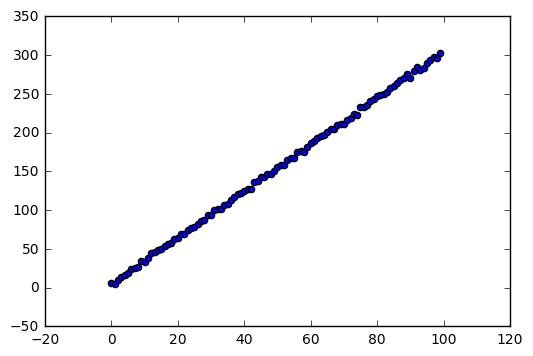

In [13]:
# Q1: 값이 내려가야 함. 에러들의 제곱합인데, 에러들은 0보다 같더나 클 수밖에 없는 값이고, 이를 제곱한 후 합한 값임.
# 오차가 작으면 작을 수록 좋겠죠?
# Q2: 
x=[]
y=[]
for i in range(100):
    error=np.random.normal(0,2)
    x.append(i)
    y.append(3*i+5+error)
plt.scatter(x,y)